# Brief analysis of the data

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import json
import ast
import requests
import os

## Importing data

In [43]:
# Import movies dataset
movie_metadata = pd.read_csv('dataset/MovieSummaries/movie.metadata.tsv', sep='\t', header=None , 
names=['WikiID', 'FreebaseID', 'Name', 'Release', 'BoxRevenue', 'Runtime', 'Languages', 'Countries', 'Genres'])
movie_metadata.head()

,WikiID,FreebaseID,Name,Release,BoxRevenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [44]:
# Preprocessing dataset: convert dates to datetime, countries, genres and languages to string
movie_metadata["Release"] = movie_metadata["Release"].apply(lambda x: pd.to_datetime(x, errors = 'coerce')).apply(lambda x: x.strftime('%Y') if pd.notnull(x) else x)
movie_metadata["Countries"] = movie_metadata["Countries"].apply(lambda x: list(ast.literal_eval(x).values()) if pd.notnull(x) else x)
movie_metadata["Languages"] = movie_metadata["Languages"].apply(lambda x: list(ast.literal_eval(x).values()) if pd.notnull(x) else x)
movie_metadata["Genres"] = movie_metadata["Genres"].apply(lambda x: list(ast.literal_eval(x).values()) if pd.notnull(x) else x)


movie_metadata.head()

,WikiID,FreebaseID,Name,Release,BoxRevenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]


The following characteristics can be observed in the imported data set

1. Wikipedia movie ID
2. Freebase movie ID
3. Movie name
4. Movie release date
5. Movie box office revenue
6. Movie runtime
7. Movie languages (Freebase ID:name tuples)
8. Movie countries (Freebase ID:name tuples)
9. Movie genres (Freebase ID:name tuples)


## Primary analysis

This is an initial analysis of the dataset.

**Movies country of origin**

We looked at movies' countries of origin. While doing so, we observed that most of the given movies come from the United States of America. This is a piece of important information for future analysis.
In fact, when studying characters' representation, we will know that it mostly comes from characters in US movies. It would be significant to analyze sex and ethnicity representation for each country individually.
Moreover, we looked at the time evolution of countries of origin. This analysis showed an increase in movies from the US  and United Kingdom. This time evolution could be compared to the representation evolution.


In [45]:
# Explode countries for visualization
processed = movie_metadata
processed = processed.explode(column="Countries").reset_index(drop = True)
processed.head()

,WikiID,FreebaseID,Name,Release,BoxRevenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],United States of America,"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,[English Language],United States of America,"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],Norway,"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],United Kingdom,"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],Germany,[Drama]


Countries
United States of America    34408
India                        8411
United Kingdom               7868
France                       4395
Italy                        3163
Name: Name, dtype: int64


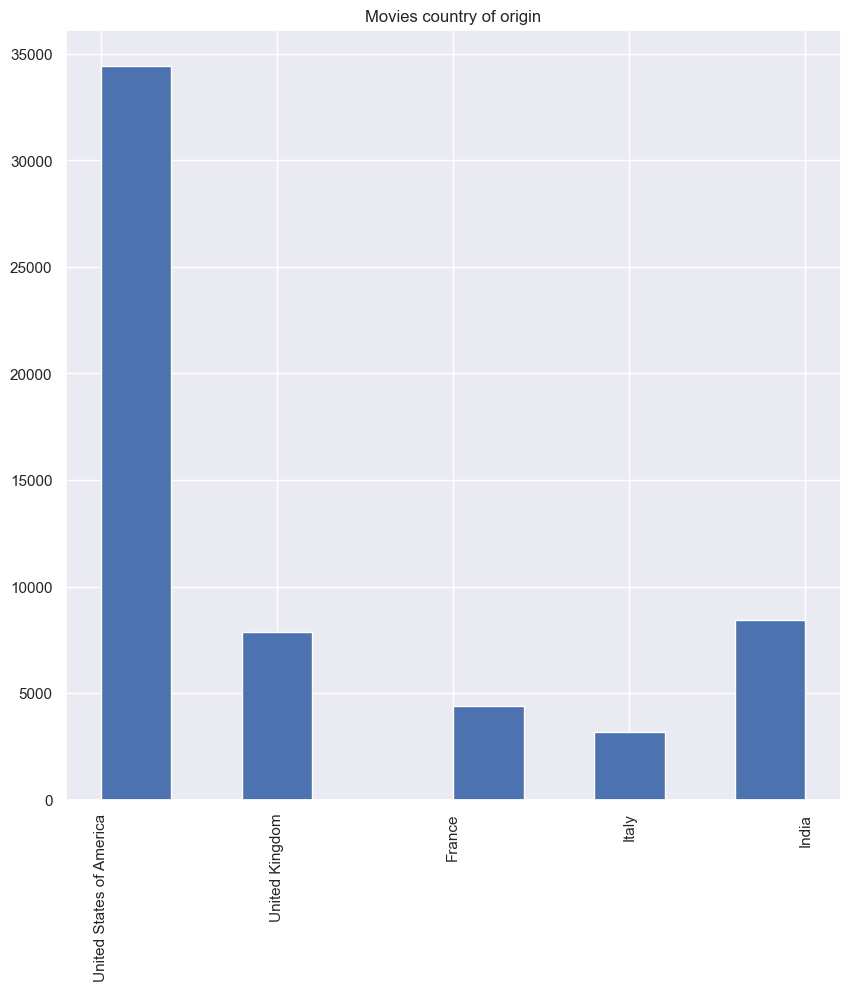

In [46]:
# Plot histogram of the countries with the most productions
k = processed.groupby(by="Countries")["Name"].count().nlargest(5).index
pruned = processed[processed["Countries"].apply(lambda x: x in k)]
pruned["Countries"].hist()
plt.xticks(rotation=90)
plt.title('Movies country of origin')
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("darkgrid")
print(processed.groupby(by="Countries")["Name"].count().nlargest(5, "all").sort_values(ascending=False))

<AxesSubplot:xlabel='Release', ylabel='Countries'>

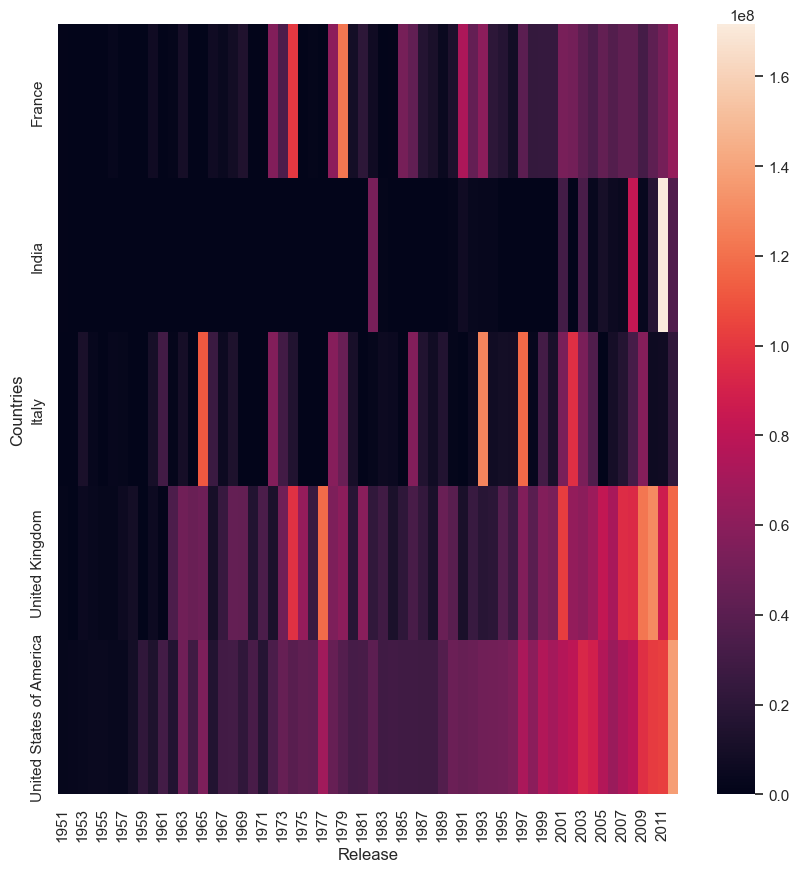

In [47]:
# What are the most common genres for the 5 top producing countries
temp = pruned[pruned["Release"].notna()]
temp = temp[temp["Release"].astype(float)>1950].pivot_table(index = 'Countries', columns='Release', values='BoxRevenue', aggfunc='mean', fill_value=0)
sns.heatmap(temp)

**Box Revenue**

Additionally, we studied the box revenue of each movie based on the movie genres from the United States and the United Kingdom, as they represent most of the given movies. Movies with the most significant revenue are linked to epic genres around 2009. After 2009, Superhero movies dominate in the United States.
It would be interesting to look at representation in this genre to see if representation is linked to higher or lower revenue. However, there is a limitation. We only have access to the box office, and thus we weren't able to compare it to the movie investment.

When we looked at global box revenue, we observed the epic genre to have the highest box revenue around the same time (2009). After 2009, we don't have genres that stand out.

Text(0.5, 1.0, 'Box revenue UK')

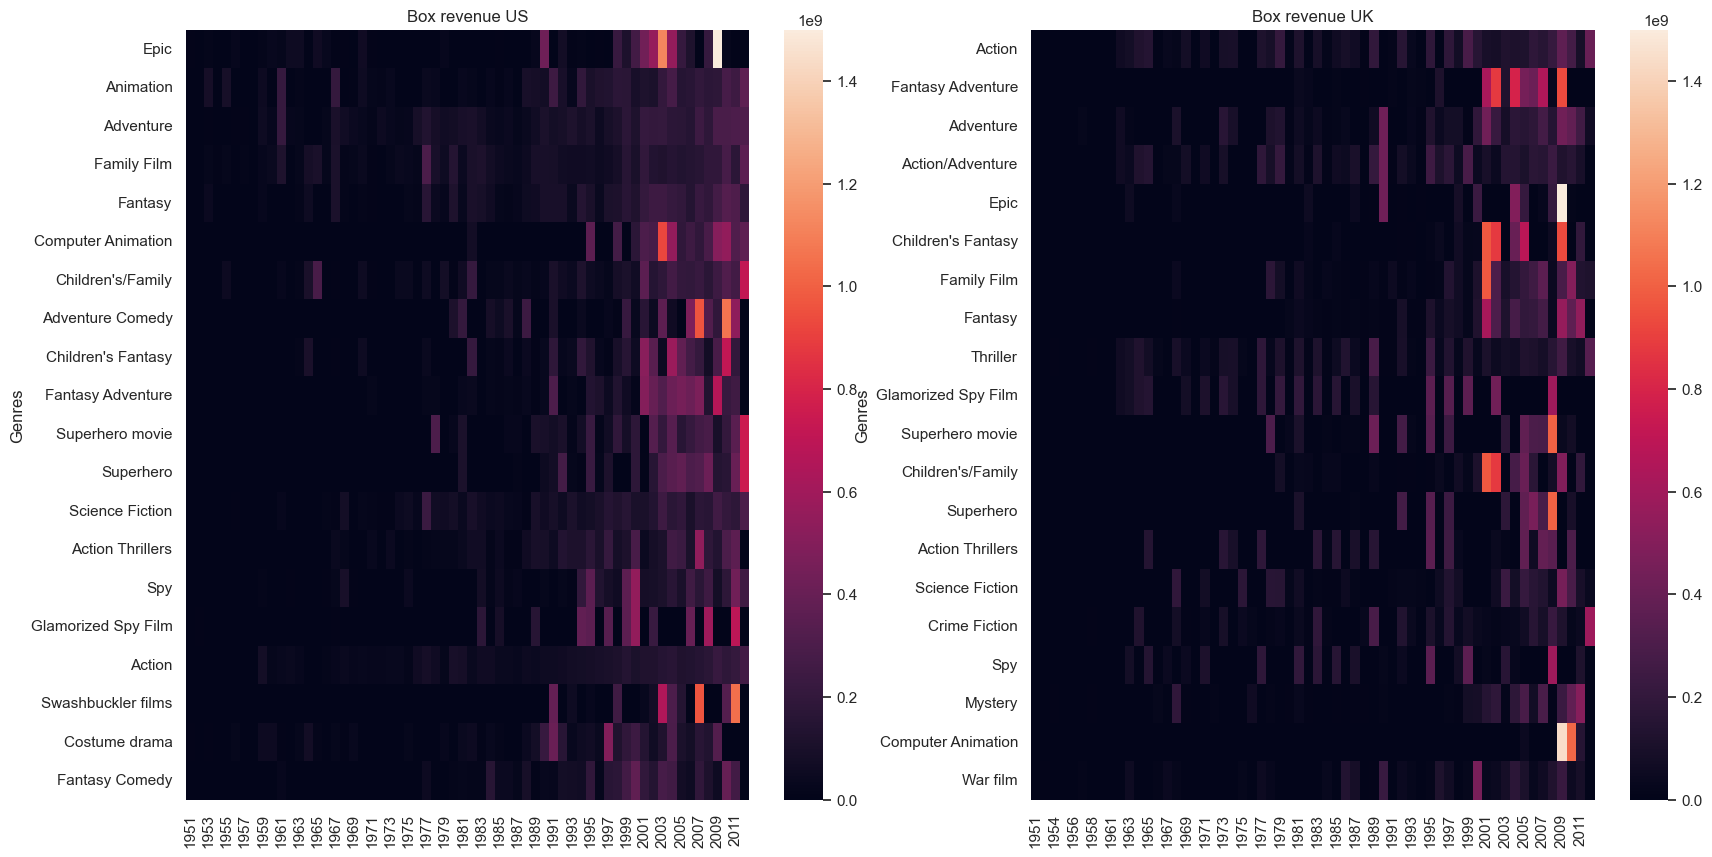

In [48]:
# Box revenue of genres vs release date for the US
exploded = pruned[pruned["Countries"].apply(lambda x: x =="United States of America" )].explode("Genres")
tmp = exploded.pivot_table(index = 'Genres', columns='Release', values='BoxRevenue', aggfunc='mean', fill_value=0)
d = tmp.apply(lambda x: sum(x), axis = 1)
d.name = 'tmp'
tmp = pd.concat([tmp, d], axis=1).nlargest(20, 'tmp').drop('tmp', axis=1)
tmp = tmp.loc[:, tmp.apply(lambda x: int(x.name)>1950, axis = 0)]
# Box revenue of genres vs release date for the UK
exploded = pruned[pruned["Countries"].apply(lambda x: x =="United Kingdom" )].explode("Genres")
temp = exploded[exploded["Release"].notna()]
temp = temp[temp["Release"].astype(float)>1950].pivot_table(index = 'Genres', columns='Release', values='BoxRevenue', aggfunc='mean', fill_value=0)
d = temp.apply(lambda x: sum(x), axis = 1)
d.name = 'temp'
temp = pd.concat([temp, d], axis=1).nlargest(20, "temp").drop('temp', axis=1)
# The max values has been fixed at 1.5e9
f,(ax1,ax2) = plt.subplots(1,2, figsize=(20, 10))
ax1 = sns.heatmap(tmp, ax = ax1, vmax=1.5e9)
ax1.set_title("Box revenue US")
ax2 = sns.heatmap(temp, ax=ax2, vmax=1.5e9)
ax2.set_title("Box revenue UK")


<AxesSubplot:ylabel='Genres'>

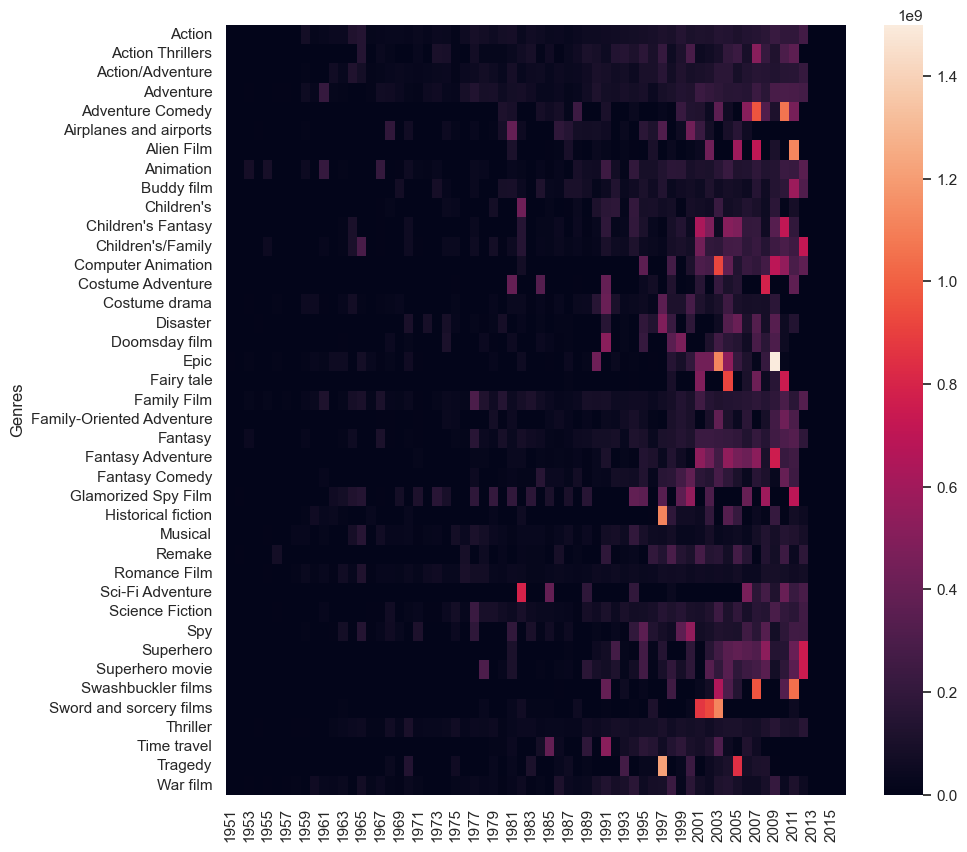

In [49]:
# BoxRevenue globally
exploded = pruned.explode("Genres")
tmp = exploded.pivot_table(index = 'Genres', columns='Release', values='BoxRevenue', aggfunc='mean', fill_value=0, dropna=False)
d = tmp.apply(lambda x: x.sum(skipna=True), axis = 1)
d.name = 'tmp'
tmp = pd.concat([tmp, d], axis=1).nlargest(40, 'tmp').drop('tmp', axis=1)
tmp = tmp.loc[:, tmp.apply(lambda x: int(x.name)>1950, axis = 0)]
tmp = tmp.sort_index()
# The max value has been fixed at 1.5e9 for better visualization
sns.heatmap(tmp, vmax=1.5e9)

## Characters' representation

In [50]:
# Import characters dataset and preprocessing
characters = pd.read_csv('dataset/MovieSummaries/character.metadata.tsv', sep='\t', header=None, 
names = ["WikiID", "FreebaseID", "Release", "Character name", "Birth", 
"Gender", "Height (m)", "Ethnicity", "Name", "Age at movie release",
"Freebase character/actor map ID", "Freebase character ID", "Freebase actor ID"])
characters["Release"] = characters["Release"].apply(lambda x: pd.to_datetime(x, errors = 'coerce')).apply(lambda x: x.strftime('%Y') if pd.notnull(x) else x)
characters["Birth"] = characters["Birth"].apply(lambda x: pd.to_datetime(x, errors = 'coerce')).apply(lambda x: x.strftime('%Y') if pd.notnull(x) else x)
characters.head()

,WikiID,FreebaseID,Release,Character name,Birth,Gender,Height (m),Ethnicity,Name,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001,Akooshay,1958,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001,Lieutenant Melanie Ballard,1974,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001,Desolation Williams,1969,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001,Sgt Jericho Butler,1967,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001,Bashira Kincaid,1977,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


**Ethnicities**

At first, we had to match FreebaseIDs to comprehensible ethnicities. After doing so, we looked at ethnicity representation across time in movies from top-producing countries. We can see that one ethnicity seems to be very present throughout time. In fact, Indian ethnicity is very present, especially around 2005.  This seemed odd at first since we have previously seen that most movies come from the United States. However, this may be because movies from India list more main characters than other movies. Thus, we decided to look at ethnicity representation throughout time per country. In our graph representing ethnicities in movies from the United States, we see a different representation. It is, therefore, necessary to normalize our data of ethnicities per movie to avoid false assumptions due to different numbers of characters per movie for example.

Then we decided to look at age distribution in function of ethnicities and time. We discovered that most all ethnicities have similar age distributions. Additionally, we wanted to look at age distribution in function of ethnicity and sex. The main observation here was the clear distinction between the male and female actors' age. Moreover, we can see that Indian actresses are much younger than other actresses. It would be interesting to look into this age difference more precisely in future analysis. Furthermore, we should look into the statistical significance of representation differences. Finally, we could compare ethnic representation to the population of the country of origin.

A limitation we have seen is for movies coming from India. In fact, the written ethnicity of most of the actors is Indian. The dataset doesn't go into precise ethnic groups, which makes the analysis vague for most countries.

In [51]:
# Generate the list of different ethnicities
ethnicities = characters['Ethnicity'].dropna().unique().tolist()

In [52]:
# Function which allows query search of ids using Wikidata SPARQL service
def get_ethnicities(ids):

  tmp = '""'.join(ids)

  url = 'https://query.wikidata.org/sparql'
  query = '''
  SELECT  ?ethnicities ?sLabel WHERE {
  VALUES ?ethnicities {"'''+tmp+'''"} 
  ?s wdt:P646 ?ethnicities .

    SERVICE wikibase:label {
      bd:serviceParam wikibase:language "en" .
    }
  }
  '''
  r = requests.post(url, params = {'format': 'json', 'query': query})
  data = r.json()
  return data

In [53]:
d1 = get_ethnicities(ethnicities[1:200])
d2 = get_ethnicities(ethnicities[201:478])
tmp1 = []
tmp2 = []
for d in (d1, d2):
    for el in d["results"]["bindings"]:
        tmp1.append(el["ethnicities"]["value"])
        tmp2.append(el["sLabel"]["value"])
table_eth = pd.DataFrame(tmp1, tmp2).reset_index().rename(columns = {"index": "Ethnicities", 0: "code"})
table_eth.head()
# Table associating the freebase id with the ethnicities

,Ethnicities,code
0,European Americans,/m/02vsw1
1,Slavs,/m/0790v
2,German Americans,/m/01qhm_
3,Swiss,/m/025_0f0
4,Omaha people,/m/064b9n


In [54]:
"""Code for querying using Google's knowledge graph"""
import json
import urllib
# We are only going to use the Google's KG for the remaining codes that we couldn't find in WikiData 
ids = list(set(ethnicities) - set(table_eth["code"]))
# Private api key for using Google's API
if os.path.isfile("api_key.txt"):
  api_key = open("api_key.txt").read()
  service_url = 'https://kgsearch.googleapis.com/v1/entities:search'
  params = {
      'limit': 500,
      'indent': True,
      'key': api_key,
  }
  url = service_url + '?' + 'ids='+'&ids='.join(ids).replace("/", "%2F" )+'&'+urllib.parse.urlencode(params)
  response = json.loads(urllib.request.urlopen(url).read())
  for element in response['itemListElement']:
    print(element['result']['name'] + ' (' + str(element['result']["@id"]) + ')')
  tmp1 = []
  tmp2 = []
  for element in response['itemListElement']:
      tmp2.append(element['result']['name'])
      tmp1.append(element['result']["@id"].replace("kg:", ''))
  table_eth = pd.concat([table_eth, pd.DataFrame(tmp1, tmp2).reset_index().rename(columns = {"index": "Ethnicities", 0: "code"})])
table_eth.head()


,Ethnicities,code
0,European Americans,/m/02vsw1
1,Slavs,/m/0790v
2,German Americans,/m/01qhm_
3,Swiss,/m/025_0f0
4,Omaha people,/m/064b9n


In [55]:
# Replace ethnicity code by value
characters["Ethnicity"] = characters["Ethnicity"].apply(lambda x: table_eth["Ethnicities"][table_eth["code"]==x].values[0]
if any(table_eth["code"]==x) else x)
characters.head()

,WikiID,FreebaseID,Release,Character name,Birth,Gender,Height (m),Ethnicity,Name,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001,Akooshay,1958,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001,Lieutenant Melanie Ballard,1974,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001,Desolation Williams,1969,M,1.727,African Americans,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001,Sgt Jericho Butler,1967,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001,Bashira Kincaid,1977,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [56]:
# Find character which appear in the movies made by the top producing countries
charac_group = pruned.groupby(by="Countries", as_index=True).apply(lambda x: 
characters[["WikiID", "Release", "Gender", "Ethnicity","Age at movie release", "Birth"]][characters["WikiID"].isin(x["WikiID"])])
charac_group.to_pickle("data/charac_group")
charac_group.head()

WikiID Release Gender Ethnicity  Age at movie release Birth
Countries                                                                   
France    99   22087420    1959      M       NaN                  56.0  1903
          215  23215861    1982      M       NaN                   NaN  1944
          216  23215861    1982    NaN       NaN                   NaN   NaT
          217  23215861    1982      M       NaN                   NaN  1940
          218  23215861    1982      F       NaN                   NaN  1940

/var/folders/8f/1fwktw092j950rh22tzxj25c0000gn/T/ipykernel_6401/3874780687.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp[tmp["Release"]>1940][tmp["Release"]<2005][tmp["Ethnicity"].notna()]


31524


Text(0.5, 1.0, 'Ethnic representation across time')

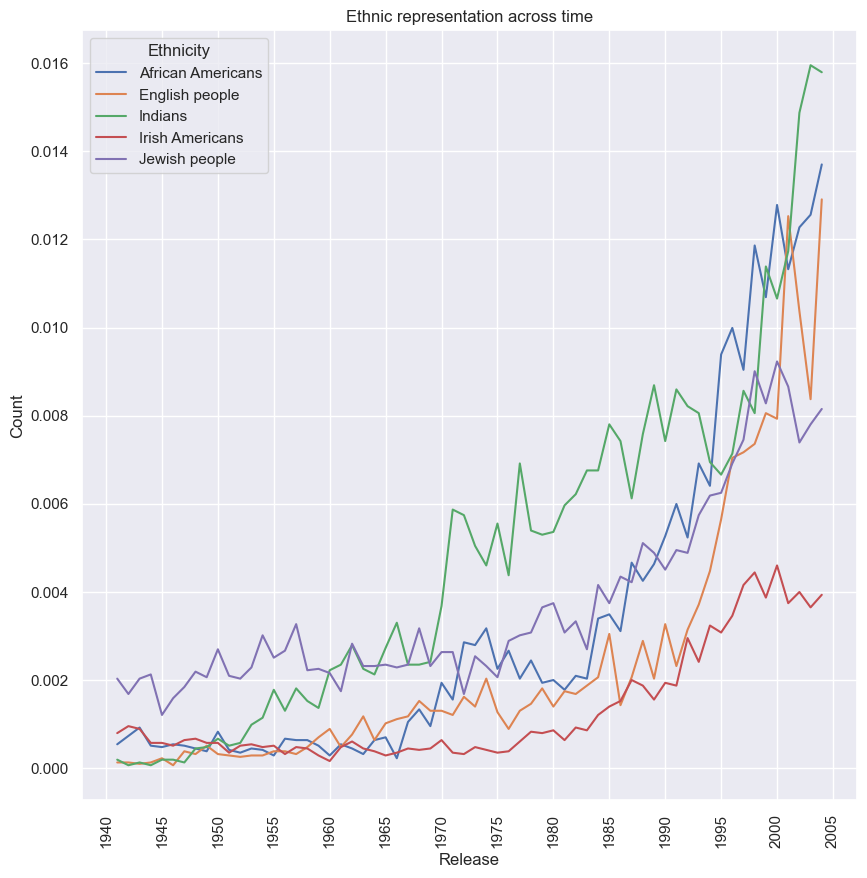

In [69]:
# Generate plot of people of different ethnicities vs the date of release
tmp = charac_group.reset_index().drop(columns="level_1")
tmp = tmp[tmp["Release"].notna()]
tmp["Release"] = tmp["Release"].astype(float)
tmp = tmp[tmp["Release"]>1940][tmp["Release"]<2005][tmp["Ethnicity"].notna()]
tmp = tmp[tmp["Ethnicity"].isin(tmp["Ethnicity"].value_counts().nlargest(5).index)]

t=tmp.groupby(by=["Ethnicity", "Release"]).count().reset_index().rename(columns = {"Countries": "Count"})

sns.lineplot(data=t, x = "Release", y="Count", hue="Ethnicity")
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=20)
plt.title('Ethnic representation across time')

In [77]:
# Generate plot of people of different ethnicities in movies from United States vs the date of release
tmp = charac_group.reset_index().drop(columns="level_1")
tmp = tmp[tmp["Release"].notna()]
tmp["Release"] = tmp["Release"].astype(float)
tmp = tmp[tmp["Release"]>1940][tmp["Countries"]=="United States of America"][tmp["Release"]<2005][tmp["Ethnicity"].notna()]
tmp = tmp[tmp["Ethnicity"].isin(tmp["Ethnicity"].value_counts().nlargest(5).index)]

t=tmp.groupby("Release")["Ethnicity"].count().mean().reset_index().rename(columns = {"Countries": "Count"})

sns.lineplot(data=t, x = "Release", y="Count", hue="Ethnicity")
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=20)
plt.title('Ethnic representation in US movies across time')

/var/folders/8f/1fwktw092j950rh22tzxj25c0000gn/T/ipykernel_6401/3877059519.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp[tmp["Release"]>1940][tmp["Countries"]=="United States of America"][tmp["Release"]<2005][tmp["Ethnicity"].notna()]


AttributeError: 'float' object has no attribute 'rename'

/var/folders/8f/1fwktw092j950rh22tzxj25c0000gn/T/ipykernel_6401/2270723779.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp[tmp["Age at movie release"]>0][tmp["Release"]>1940][tmp["Ethnicity"].notna()]


Text(0.5, 1.0, 'Actors age in function of their ethnicities across time')

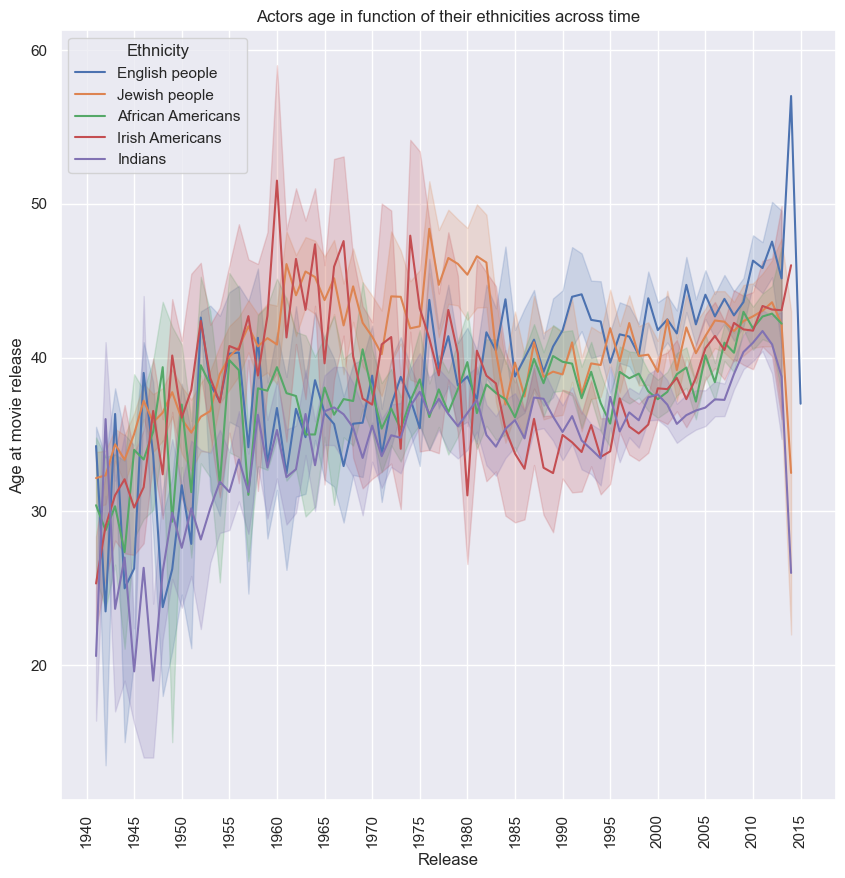

In [59]:
# Generate plot of age of people of different ethnicities vs the date of release
tmp = charac_group.reset_index().drop(columns="level_1")
tmp = tmp[tmp["Release"].notna()]
tmp["Release"] = tmp["Release"].astype(float)
tmp = tmp[tmp["Age at movie release"]>0][tmp["Release"]>1940][tmp["Ethnicity"].notna()]
tmp = tmp[tmp["Ethnicity"].isin(tmp["Ethnicity"].value_counts().nlargest(5).index)]

tmp["Release"] = tmp["Release"].astype(float)
sns.lineplot(data=tmp, x = "Release", y="Age at movie release", hue="Ethnicity")
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=20)
plt.title('Actors age in function of their ethnicities across time')

We had to filter all the people whoose age was >0 as the dataset contains aberrant values (negative). Furthermore, we filtered plotted only the data points for which date>1940 as the previous movies also showed an unexpected behaviour

Explanation:.....

TO DO: Find reasons why the age of people for movies <1940 is lower than 20 (of course babies are not acting rigth?)

/var/folders/8f/1fwktw092j950rh22tzxj25c0000gn/T/ipykernel_6401/390515111.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp[tmp["Age at movie release"]>0][tmp["Release"]>1940][tmp["Gender"].notna()]


Text(0.5, 1.0, 'Actors age in function of their ethnicities and sex across time')

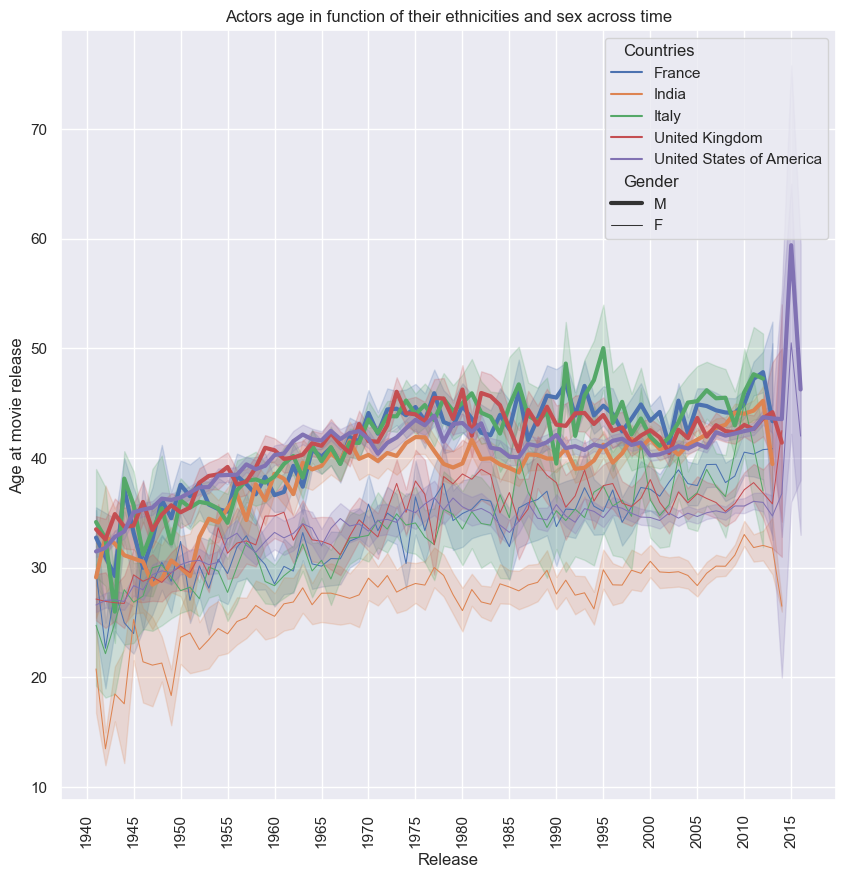

In [60]:
# Plot of age at movie release vs date of film for different countries/sex
tmp = charac_group.reset_index().drop(columns="level_1")
tmp = tmp[tmp["Release"].notna()]
tmp["Release"] = tmp["Release"].astype(float)
tmp = tmp[tmp["Age at movie release"]>0][tmp["Release"]>1940][tmp["Gender"].notna()]

tmp["Release"] = tmp["Release"].astype(float)
sns.lineplot(data=tmp, x = "Release", y="Age at movie release", hue="Countries", size="Gender")
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=20)
plt.title('Actors age in function of their ethnicities and sex across time')